In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

In [5]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [10]:
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### Training a model 

In [11]:
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

#### Evaluating the model

In [12]:
y_pred_pca = model_pca.predict(X_test_pca)
print(f'PCA Accuracy: {accuracy_score(y_test, y_pred_pca)}')
print(classification_report(y_test, y_pred_pca))


PCA Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.98      0.90      0.94        50
           2       0.94      0.98      0.96        47
           3       0.94      0.93      0.93        54
           4       0.98      1.00      0.99        60
           5       0.97      0.94      0.95        66
           6       0.96      0.98      0.97        53
           7       0.98      0.98      0.98        55
           8       0.84      0.88      0.86        43
           9       0.91      0.90      0.91        59

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



## LDA

help to reduce to 9 components

In [13]:
lda = LDA(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

#### Training a model 

In [14]:
model_lda = RandomForestClassifier(random_state=42)
model_lda.fit(X_train_lda, y_train)

RandomForestClassifier(random_state=42)

#### Evaluating the model

In [15]:
y_pred_lda = model_lda.predict(X_test_lda)
print(f'LDA Accuracy: {accuracy_score(y_test, y_pred_lda)}')
print(classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.92      0.94        50
           2       0.96      0.96      0.96        47
           3       0.93      0.94      0.94        54
           4       0.98      0.97      0.97        60
           5       0.97      0.97      0.97        66
           6       0.98      0.98      0.98        53
           7       0.95      0.98      0.96        55
           8       0.85      0.95      0.90        43
           9       0.96      0.88      0.92        59

    accuracy                           0.96       540
   macro avg       0.95      0.96      0.95       540
weighted avg       0.96      0.96      0.96       540



## t-SNE for Visualization

Apply t-SNE to reduce to 2 dimensions for visualization

In [16]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

#### Create a scatter plot to visualize

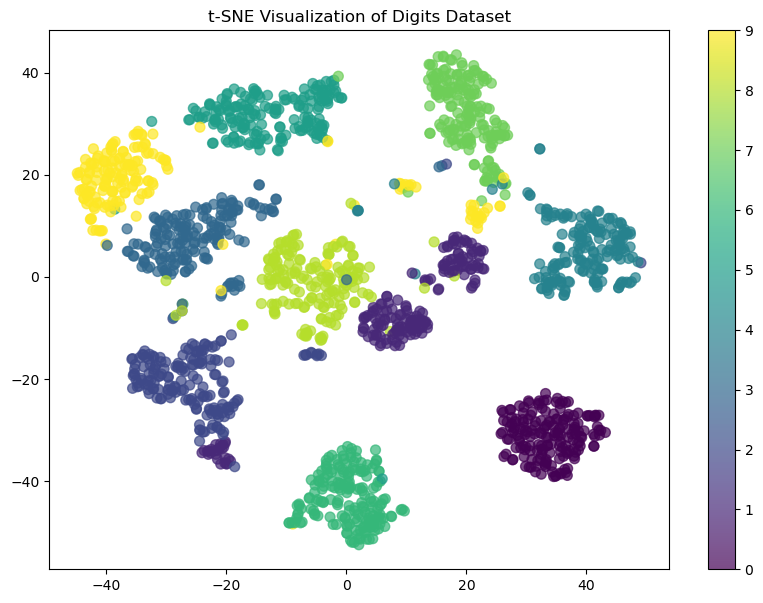

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar()
plt.title('t-SNE Visualization of Digits Dataset')
plt.show()

## RFE

Used Feature Selection

In [23]:
# use with random forest classifier

rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

#### Training a model

In [24]:
model_rfe = RandomForestClassifier(random_state=42)
model_rfe.fit(X_train_rfe, y_train)

RandomForestClassifier(random_state=42)

#### Evaluating the model

In [25]:
y_pred_rfe = model_rfe.predict(X_test_rfe)
print(f'RFE Accuracy: {accuracy_score(y_test, y_pred_rfe)}')
print(classification_report(y_test, y_pred_rfe))

RFE Accuracy: 0.9611111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      0.98      0.96        50
           2       0.98      0.98      0.98        47
           3       0.96      0.91      0.93        54
           4       0.94      0.97      0.95        60
           5       1.00      0.95      0.98        66
           6       0.98      0.98      0.98        53
           7       0.95      0.98      0.96        55
           8       0.89      0.95      0.92        43
           9       0.96      0.92      0.94        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

